# Numerical Simulation Laboratory

# Numerical exercise 1 

## Exercise 01.1
Il primo eserecizio consiste nel testare il generatore di numeri casuali determinando la media, la varianza e il chi quadrato di una successione di numeri casuali.

### <font color='blue'> Valore medio </font>
Determino il valore medio della successione di numeri casuali generati in modo uniforme sull'intervallo $[0,1]$. Il valore medio atteso di una tale distribuzione è dato da 
    $$\langle r \rangle = \int_0^1 r dr = 1/2 \,.$$
Il grafico sottostante riporta il valore medio ottenuto utilizzando il metodo delle **medie a blocchi** per una distibuzione di $10^6$ valori casuali suddivisi in $100$ blocchi distinti. La stima del valore medio è ottenuta tramite medie progressive su blocchi successivi e la corrispondente incertezza è data dalla deviazione standard della media. Come si può osservare, utilizzando un elevato numero di misure, il valore medio è compatibilie con il valore atteso.

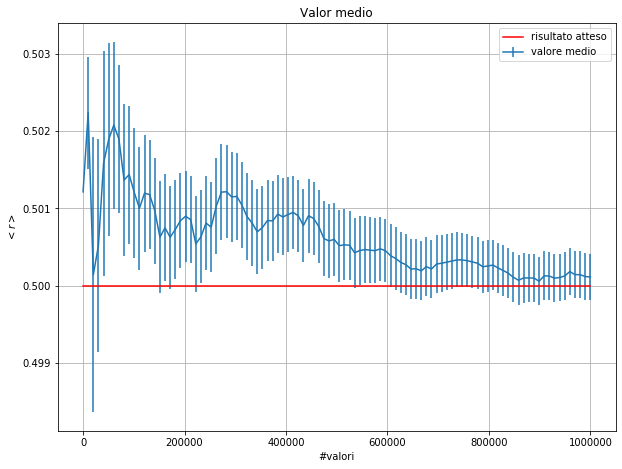

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7.5))
ave, err = np.loadtxt('./Files/ave.out', delimiter = '  ', unpack = 'True')

x = np.linspace(0,10**6,100)
y = 0.5*x**0  #valore atteso

plt.errorbar(x, ave, yerr=err, label='valore medio') #grafico simulazione
plt.plot(x,y, color='red', label='risultato atteso') #grafico risultato atteso
plt.title('Valor medio')
plt.xlabel('#valori')
plt.ylabel('$<r>$')
plt.legend()
plt.grid(True)

### <font color='blue'> Varianza</font>
Determino la varianza della successione di numeri casuali generati in modo uniforme sull'intervallo $[0,1]$. La varianza attesa per una tale distribuzione è data da 
    $$\sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12 \,.$$
Il grafico sottostante riporta la varianza calcolata utilizzando il metodo delle **medie a blocchi** per una distibuzione di $10^6$ valori casuali suddivisi in $100$ blocchi distinti. La stima della varianza è ottenuta tramite medie progressive su blocchi successivi e la corrispondente incertezza è data dalla deviazione standard della media. Come si può osservare, già a circa metà del procedimento, la varianza converge al valore atteso.

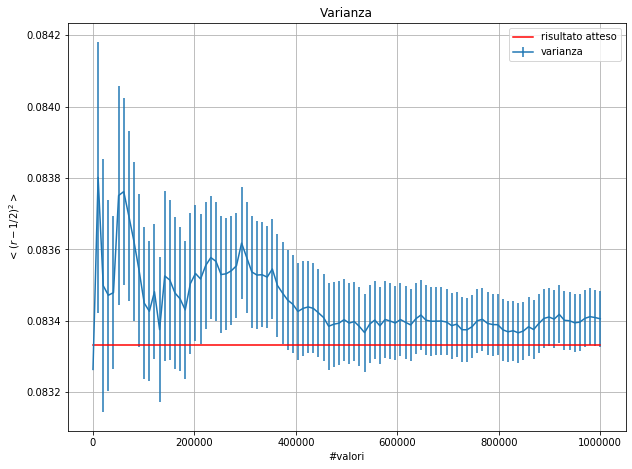

In [2]:
plt.figure(figsize=(10, 7.5))
var, err = np.loadtxt('./Files/var.out', delimiter = '  ', unpack = 'True')

x = np.linspace(0,10**6,100)
y = 1/12*x**0   #valore atteso

plt.errorbar(x, var, yerr=err, label='varianza') #grafico simulazione
plt.plot(x,y, color='red', label='risultato atteso') #grafico risultato atteso
plt.title('Varianza')
plt.xlabel('#valori')
plt.ylabel('$<(r-1/2)^2>$')
plt.legend()
plt.grid(True)

### <font color='blue'> Test $\chi^2$</font>
Effettuo il test del $\chi^2$ sulla successione di valori casuali per verificare che siano rispettate le ipotesi di uniformità durante l'intero processo di generazione. Il valore atteso è dato da
    $$\chi^2 = \sum_{i=1}^M \frac{\left( n_i - n/M \right)^2}{n/M} \,,$$
dove $n_i$ indica il numero di valori che cadono nell' $i$-esimo intervallo, $n$ è il numero di valori generati per ogni stima di $\chi^2$ e $M$ è il numero di sottointervalli equiprobabili in cui è stato diviso l'intervallo $[0,1]$. 
Avendo suddiviso l'intervallo in $100$ sottointervalli equiprobabili e avendo utilizzato $10^4$ valori casuali per ciascuna stima, il valore atteso è $\chi^2 \simeq 100$. 
Il grafico sottostante riporta le $100$ stime del *chi quadrato* ottenute iterando tale procedimento: come è possibile osservare, il valore oscilla intorno al valore atteso mostrando che la distribuzione di valori casuali è uniforme durante tutto il processo di generazione.

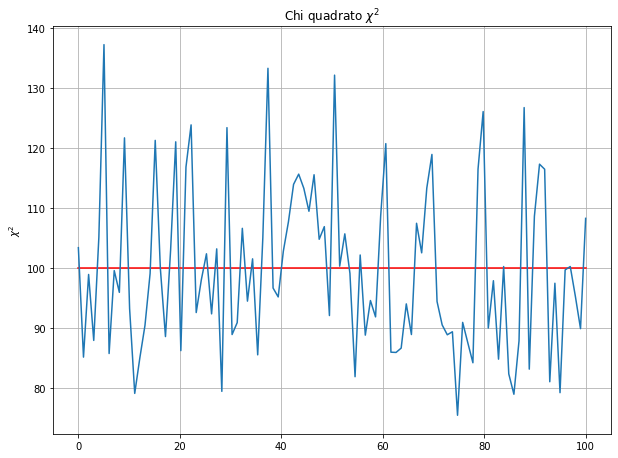

In [4]:
plt.figure(figsize=(10, 7.5))
chi2 = np.loadtxt('./Files/chi.out', delimiter = '  ', unpack = 'True')

x = np.linspace(0,100,100)
y = 100*x**0   #valore atteso

plt.plot(x,y, color='red') #grafico risultato atteso
plt.plot(x,chi2) #grafico chi quadro
plt.title("Chi quadrato $\chi^2$")
plt.ylabel('$\chi^2$')
plt.grid(True)

## Exercise 01.2

Determino la media $S_N$ di $N$ numeri casuali determinati secondo le distribuzioni di probabilità uniforme, esponenziale e Lorentziana:
    $$S_N = \frac{1}{N} \sum_{i=1}^N x_i \quad N=1,2,10,100 \,. $$

### <font color='blue'> Distribuzione uniforme</font>
Generando $10^5$ valori casuali distribuiti in modo uniforme nell'intervallo $[0,1]$ posso determinarne la media $S_N$ al variare di $N=1,2,10,100$. I risultati ottenuti sono qui riportati in forma di istogramma e per il caso $N=100$ è stato effettuato un *fit* dei dati con una curva gaussiana. Si può osservare che c'è un accordo qualitativo tra l'istogramma e la curva i cui parametri ottenuti dai dati sono $\mu=0.50006$ e $\sigma=0.02886$.

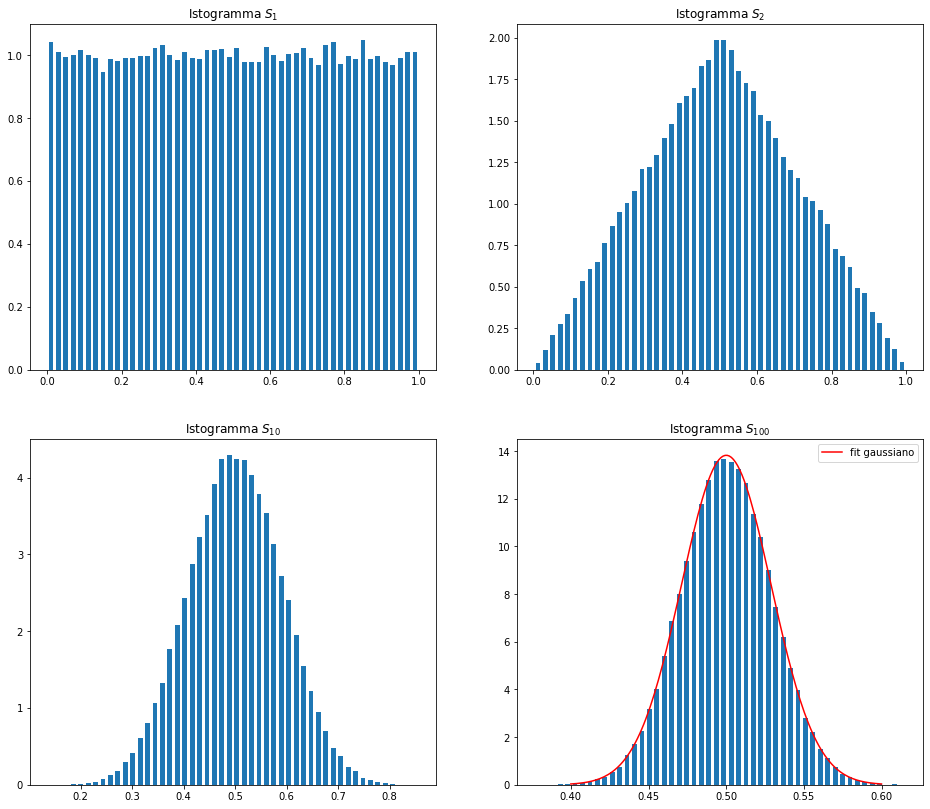

In [2]:
import math
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy.stats import norm

#importo i dati relativi all'istogramma uniforme
S1, S2, S10, S100 = np.loadtxt('./Files/SNstand.out', delimiter = '  ', unpack = 'True')

x = np.linspace(0.4, 0.6, 150, endpoint=True)
mu, sigma = norm.fit(S100)  #ottengo mu, sigma dal fit dei dati
y = norm.pdf(x, mu, sigma)   #gaussiana media=mu, varianza=sigma
#print(mu,sigma)

plt.figure(figsize=(16, 14))

plt.subplot(221)
plt.hist(S1, bins=50, rwidth=0.65, density=True) #istogramma N=1
plt.title("Istogramma $S_1$")

plt.subplot(222)
plt.hist(S2, bins=50, rwidth=0.65, density=True) #istogramma N=2
plt.title("Istogramma $S_2$")

plt.subplot(223)
plt.hist(S10, bins=50, rwidth=0.65, density=True) #istogramma N=10
plt.title("Istogramma $S_{10}$")

plt.subplot(224)
plt.hist(S100, bins=50, rwidth=0.65, density=True) #istogramma N=100
plt.plot(x,y, color='red', label='fit gaussiano') #fit con la gaussiana
plt.title("Istogramma $S_{100}$")
plt.legend()

#plt.suptitle('Istogrammi normalizzati $S_N$')
plt.show()

### <font color='blue'> Distribuzione esponenziale</font>
Implemento nel generatore di numeri casuali un metodo in grado di generare numeri casuali distribuiti secondo la seguente distribuzione di probabilità esponenziale:
    $$p(x) = \lambda \exp(-\lambda x) \quad x\in [0;+\infty] \,.$$
In particolare, utilizzando il **metodo dell'inversa della cumulativa**, posso ottenere una tale densità di probabilità a partire da una variabile casuale $y$ distribuita in modo uniforme sull'intervallo $[0,1]$ applicando la seguente equazione:
$$ x = -\frac{1}{\lambda} \ln \left( 1-y \right) \,.$$
Generando in questa maniera $10^5$ valori casuali distribuiti secondo la probabilità $p(x)$ posso determinarne la media $S_N$ al variare di $N=1,2,10,100$. I risultati ottenuti sono qui riportati in forma di istogramma e per il caso $N=100$ è stato effettuato un *fit* dei dati con una curva gaussiana. Si può osservare che c'è un accordo qualitativo tra l'istogramma e la curva i cui parametri ottenuti dai dati sono $\mu=1.0001$ e $\sigma=0.0998$.

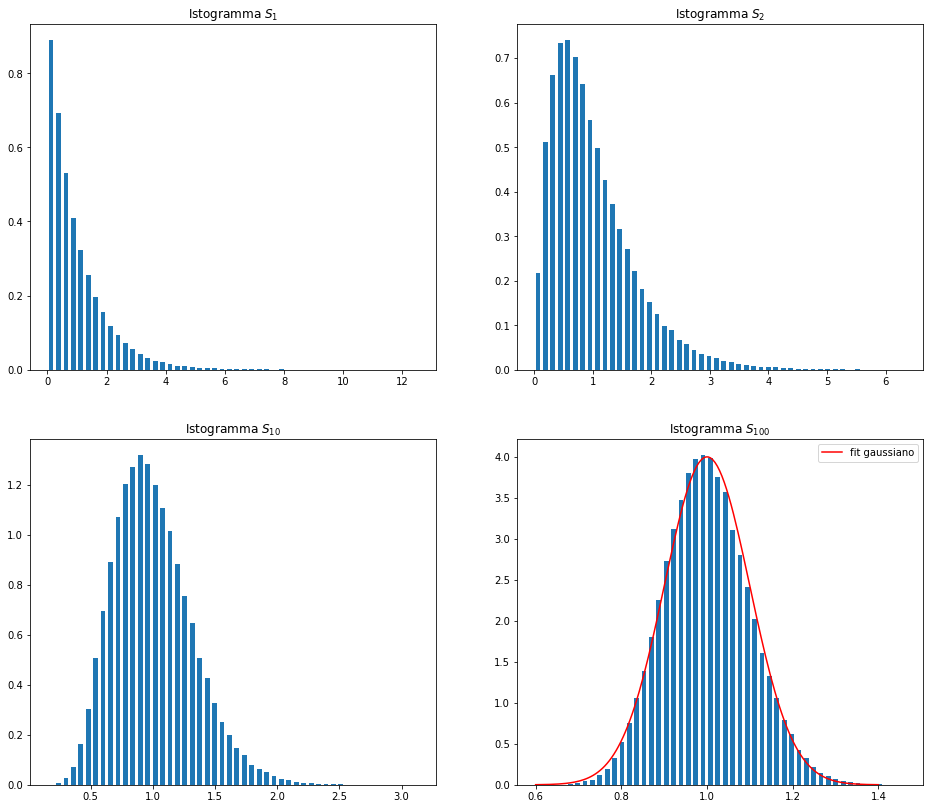

In [5]:
S1, S2, S10, S100 = np.loadtxt('./Files/SNexpo.out', delimiter = '  ', unpack = 'True')

x = np.linspace(0.6, 1.4, 150, endpoint=True)
mu, sigma = norm.fit(S100)  #ottengo mu, sigma dal fit dei dati
y = norm.pdf(x, mu, sigma)   #gaussiana media=mu, varianza=sigma
#print(mu,sigma)

nbins = 50  #numero di bins per ogni istogramma
plt.figure(figsize=(16, 14))

plt.subplot(221)
plt.hist(S1, bins=50, rwidth=0.65, density=True) #istogramma N=1
plt.title("Istogramma $S_1$")

plt.subplot(222)
plt.hist(S2, bins=50, rwidth=0.65, density=True) #istogramma N=2
plt.title("Istogramma $S_2$")

plt.subplot(223)
plt.hist(S10, bins=50, rwidth=0.65, density=True) #istogramma N=10
plt.title("Istogramma $S_{10}$")

plt.subplot(224)
plt.hist(S100, bins=50, rwidth=0.65, density=True) #istogramma N=100
plt.plot(x,y, color='red', label='fit gaussiano') #fit con la gaussiana
plt.title("Istogramma $S_{100}$")
plt.legend()

#plt.suptitle('Istogrammi normalizzati $S_N$')
plt.show()

### <font color='blue'> Distribuzione esponenziale</font>
Implemento nel generatore di numeri casuali un metodo in grado di generare numeri casuali distribuiti secondo la seguente distribuzione di probabilità Lorentziana:
    $$p(x)=\frac{1}{\pi}\frac{\Gamma}{(x-\mu)^2+\Gamma^2} \quad x\in [-\infty;+\infty]$$
In particolare, utilizzando il **metodo dell'inversa della cumulativa**, posso ottenere una tale densità di probabilità a partire da una variabile casuale $y$ distribuita in modo uniforme sull'intervallo $[0,1]$ applicando la seguente equazione:
    $$ x = \mu + \Gamma \tan \left[\pi \left(y-\frac{1}{2}\right) \right] $$
Generando in questa maniera $10^5$ valori casuali distribuiti secondo la probabilità $p(x)$ posso determinarne la media $S_N$ al variare di $N=1,2,10,100$. I risultati ottenuti sono qui riportati in forma di istogramma e per il caso $N=100$ è stato effettuato un *fit* dei dati con una curva lorentziana. Si può osservare che c'è un accordo qualitativo tra l'istogramma e la curva i cui parametri ottenuti dai dati sono $\mu=-0.0008$ e $\Gamma=0.9991$.

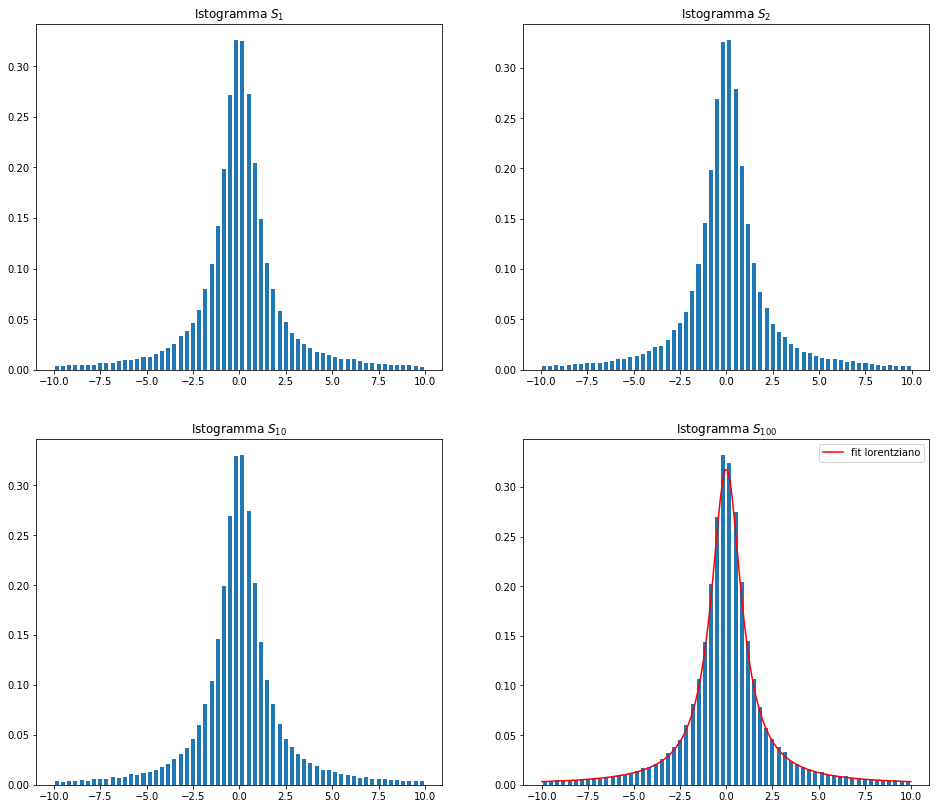

In [7]:
import array as arr
from scipy.stats import cauchy

S1, S2, S10, S100 = np.loadtxt('./Files/SNlorentz.out', delimiter = '  ', unpack = 'True')

nbins = 60  #numero di bins per ogni istogramma
bins_edge = arr.array('d')  #vettore contenente gli estremi di ogni bin
for i in range(nbins):
    bins_edge.append(-10+i*20/nbins)
bins_edge.append(10)

x = np.linspace(-10, 10, 150, endpoint=True)
mu, Gamma = cauchy.fit(S100)  #ottengo mu, Gamma dal fit dei dati
y = cauchy.pdf(x, mu, Gamma)   #Lorentziana media=mu, larghezzamma
#print(mu, Gamma)

plt.figure(figsize=(16, 14))

plt.subplot(221)
plt.hist(S1, bins=bins_edge, rwidth=0.65, density=True) #istogramma N=1
plt.title("Istogramma $S_1$")

plt.subplot(222)
plt.hist(S2, bins=bins_edge, rwidth=0.65, density=True) #istogramma N=2
plt.title("Istogramma $S_2$")

plt.subplot(223)
plt.hist(S10, bins=bins_edge, rwidth=0.65, density=True) #istogramma N=10
plt.title("Istogramma $S_{10}$")

plt.subplot(224)
plt.hist(S100, bins=bins_edge, rwidth=0.65, density=True) #istogramma N=100
plt.plot(x,y, color='red', label='fit lorentziano') #fit con la lorentziana
plt.title("Istogramma $S_{100}$")
plt.legend()

plt.show()

## Exercise 01.3

Per stimare il valore di $\pi$ attraverso l'esperimento dell'ago di Buffon, è necessario generare una serie di coppie di valori casuali $(z,\theta)$ che descrivono la posizione di un ago di lunghezza $L$ in un campo in cui le righe si trovano a distanza $d$.
- $z$ indica la distanza tra il centro dell'ago e la riga più vicina ad esso. Nella simulazione numerica corrisponde ad un valore generato uniformemente nell'intervallo $(0,\frac{d}{2})$.
- $\theta$ indica l'angolo acuto formato tra l'ago e le righe del campo. Nella simulazione numerica corrisponde ad un valore generato uniformemente nell'intervallo $[0,\frac{\pi}{2}]$.

![Needle_problem](./Pictures/Needle_problem.png)

Per evitare di usare il valore $\pi$ nella simulazione dell'esperimento, è possibile determinare $\theta$ attraverso il seguente procedimento. Inanzitutto produco una coppia di valori casuali $(x,y)$ distribuiti uniformemente nell'intervallo $[0,1]$ corrispondente ad un punto che si trova nel primo quadrante del piano cartesiano. Se i valori non soddisfano la condizione $x^2+y^2 \leq 1$, ovvero se non si trovano all'interno della circonferenza unitaria, rigetto i due valori e genero una nuova coppia ripetendo il procedimento finchè la condizione non è soddisfatta. Una volta che tale condizione è soddisfatta determino l'angolo $\theta$ formato con l'asse delle $x$ attraverso la seguente equazione trigonometrica:
$$ \theta = \arctan \left( \frac{y}{x} \right) \,.$$
Tale procedimento consente di ottenere valori di $\theta$ uniformemente distribuiti nell'intervallo $[0,\frac{\pi}{2}]$ senza utilizzare esplicitamente il valore $\pi$ durante il calcolo.
In questo modello, la <font color=red>**condizione di intersezione**</font> tra l'ago e la più vicina riga del campo è data da:
$$ z \leq \frac{1}{2}L \sin(\theta)  \,.$$
Se simulo $R$ lanci di aghi e determino che si ha intersezione per $M$ volte allora posso stimare il valore di $\pi$ attraverso la seguente equazione:
$$ \pi = \frac{2LR}{Md} \,.$$
Il grafico riportato qui mostra le stime ottenute per $\pi$ utilizzando il metodo delle **medie a blocchi** per calcolare il valore medio e le incertezze statistiche al variare del numero di lanci simulati. In particolare ho suddiviso la simulazione in $100$ blocchi con $10^4$ lanci ciascuno e ho utilizzato i seguenti valori per le dimensioni dell'ago e per la spaziatura tra le righe del campo:
- $d=0.75$ per la spaziatura tra le righe del campo.
- $L=0.5$ per la lunghezza degli aghi.

Si può osservare che all'aumentare del numero di lanci simulati, la stima di $\pi$ converge al valore esatto.

Valore esatto:  3.14159
Stima finale della simulazione:  3.14042


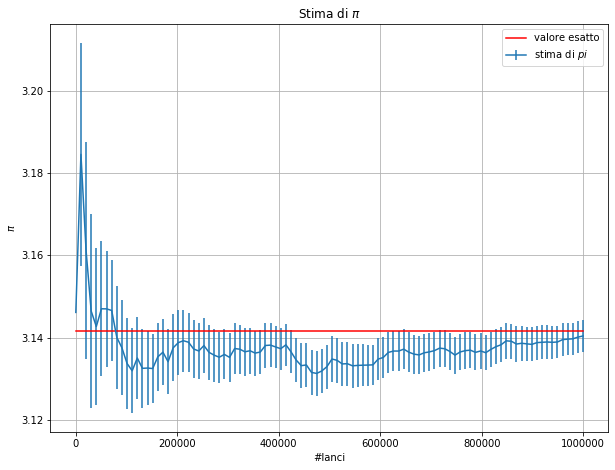

In [6]:
import math
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7.5))
pi, err = np.loadtxt('./Files/pi.out', delimiter = '  ', unpack = 'True')
print("Valore esatto: ", round(math.pi,5) )
print("Stima finale della simulazione: ", round(pi[len(pi)-1],5) )

x = np.linspace(0,10**6,100)
y = math.pi*x**0 #risultato esatto
plt.errorbar(x, pi, yerr=err, label='stima di $pi$') #grafico valori medi progressivi
plt.plot(x, y, color='red', label='valore esatto') #grafico del risultato esatto

plt.title('Stima di $\pi$')
plt.xlabel('#lanci')
plt.ylabel('$\pi$')
plt.legend()
plt.grid(True)